This notebook has been **launched just for you**. It provides an easy way to try out Stan.

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**WARNING**</p>

<p>Don't rely on this server for anything you want to last - your notebook will be *deleted after 10 minutes of inactivity*.</p>
</div>

In [2]:
%matplotlib inline
import pystan

In [3]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] <- mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

In [4]:
fit = pystan.stan(model_code=schools_code, data=schools_dat, iter=1000, chains=4)

/usr/lib/python3.4/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/usr/lib/python3.4/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/usr/lib/python3.4/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  cls(buf, protocol).dump(obj)
/usr/lib/python3.4/multiprocessing/reduction.py:50: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with

In [5]:
print(fit)

Inference for Stan model: anon_model_95013624776d537c3cd7cd4d641c30e0.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         8.06    0.27   5.36  -1.91   4.65   7.93  11.27  18.97    394    1.0
tau        7.03     0.3   5.69   0.28   2.87   5.68   9.68  21.54    352   1.01
eta[0]     0.43    0.04   0.94  -1.46  -0.19   0.44   1.06    2.3    602    1.0
eta[1]    -0.04    0.03   0.86  -1.75  -0.61  -0.04   0.54   1.65    606    1.0
eta[2]    -0.22    0.04   0.91  -1.96  -0.85  -0.21   0.44   1.58    586    1.0
eta[3]    -0.06    0.04   0.88  -1.79  -0.61  -0.06   0.51    1.7    619   1.01
eta[4]    -0.37    0.04   0.86   -2.0  -0.93  -0.39   0.19   1.39    586    1.0
eta[5]    -0.24    0.04    0.9  -2.02  -0.82  -0.26   0.34   1.54    531    1.0
eta[6]     0.37    0.04   0.86  -1.45  -0.16   0.39   0.93   2.08    571    1.0
eta[7]     0.

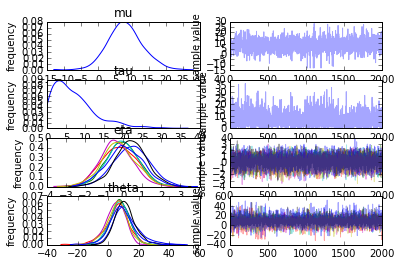

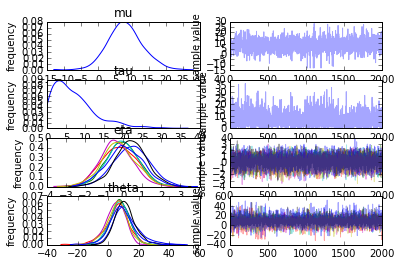

In [6]:
fit.plot()